<a href="https://colab.research.google.com/github/Stdcoders/Codsoft/blob/machine_learning/T20_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [76]:
!git clone https://github.com/Stdcoders/my_ml_projects.git

Cloning into 'my_ml_projects'...
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
!pip install plotly


In [ ]:
batting = pd.read_csv('/content/batting_stats_for_icc_mens_t20_world_cup_2024.csv')
batting.head()

,Player,Team,Mat,Inns,NO,Runs,HS,Ave,SR,100,50,0
0,NP Kenjige,United States of America,4,2,0,1,1,0.5,25.00,0,0,1
1,Aaron Jones,United States of America,6,6,2,162,94*,40.5,135.00,0,1,1
2,Aasif Sheikh,Nepal,3,3,0,63,42,21.0,88.73,0,0,0
3,Abbas Afridi,Pakistan,1,1,0,17,17,17.0,80.95,0,0,0
4,F Achelam,Uganda,1,1,0,9,9,9.0,69.23,0,0,0


In [ ]:
#team names with their highest scores
fig = go.Figure()
fig.add_trace(go.Bar(x=batting['Team'],y=batting['Runs'],name='Runs'))
fig.update_layout(title='Team and their scores',xaxis_title='Team',yaxis_title='Runs',barmode='group')

In [ ]:
highest_run_scorer = batting[batting['Runs']==batting['Runs'].max()]
print(highest_run_scorer)


                 Player         Team  Mat  Inns  NO  Runs  HS    Ave      SR  \
179  Rahmanullah Gurbaz  Afghanistan    8     8   0   281  80  35.12  124.33   

     100  50  0  
179    0   3  2  


In [ ]:
batting.describe()

,Mat,Inns,NO,Runs,Ave,SR,100,50,0
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.0,247.000000,247.000000
mean,4.408907,3.449393,0.700405,49.149798,14.176275,88.911781,0.0,0.186235,0.453441
std,2.235796,2.009244,0.835761,58.137259,14.191932,46.135606,0.0,0.515741,0.635068
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,3.000000,2.000000,0.000000,8.000000,4.000000,59.165000,0.0,0.000000,0.000000
50%,4.000000,3.000000,1.000000,25.000000,11.000000,92.850000,0.0,0.000000,0.000000
75%,6.500000,4.000000,1.000000,71.000000,21.250000,120.955000,0.0,0.000000,1.000000
max,9.000000,9.000000,4.000000,281.000000,102.000000,250.000000,0.0,3.000000,3.000000


In [ ]:
maximum_matches_played = batting[batting['Mat']==batting['Mat'].max()]
print(maximum_matches_played)

           Player          Team  Mat  Inns  NO  Runs   HS    Ave      SR  100  \
47      Q de Kock  South Africa    9     9   0   243   74  27.00  140.46    0   
76   RR Hendricks  South Africa    9     9   1   113   43  14.12   87.59    0   
88       M Jansen  South Africa    9     6   2    32  21*   8.00   96.96    0   
105     H Klaasen  South Africa    9     8   2   190   52  31.66  126.66    0   
122    AK Markram  South Africa    9     9   1   123   46  15.37  100.81    0   
134     DA Miller  South Africa    9     8   2   169  59*  28.16  102.42    0   
160      A Nortje  South Africa    9     1   1     1   1*   0.00  100.00    0   
177      K Rabada  South Africa    9     3   1     9   5*   4.50  128.57    0   
217      T Stubbs  South Africa    9     8   3   165   33  33.00  101.22    0   

     50  0  
47    2  1  
76    0  2  
88    0  1  
105   1  0  
122   0  1  
134   1  1  
160   0  0  
177   0  1  
217   0  1  


In [ ]:
fig_sr = px.bar(batting,x='Player',y='SR',title='Player and their strike rate')
fig_sr.show()

In [ ]:
fig_sc = px.scatter(batting,x='Runs',y='SR',color='Team')
fig_sc.show()

In [ ]:
fig = px.pie(batting,values='Ave',names='Team')
fig.show()

In [ ]:
highest_average_score_team = batting[batting['Ave']==batting['Ave'].max()]
print(highest_average_score_team)


           Player      Team  Mat  Inns  NO  Runs   HS    Ave      SR  100  50  \
26  RD Berrington  Scotland    4     3   2   102  47*  102.0  139.72    0   0   

    0  
26  0  


                 Player          Team  Mat  Inns  NO  Runs  HS    Ave      SR  \
179  Rahmanullah Gurbaz   Afghanistan    8     8   0   281  80  35.12  124.33   
202           RG Sharma         India    8     8   1   257  92  36.71  156.70   
75              TM Head     Australia    7     7   1   255  76  42.50  158.38   
47            Q de Kock  South Africa    9     9   0   243  74  27.00  140.46   
82       Ibrahim Zadran   Afghanistan    8     8   0   231  70  28.87  107.44   

     100  50  0  
179    0   3  2  
202    0   3  0  
75     0   2  1  
47     0   2  1  
82     0   2  1  


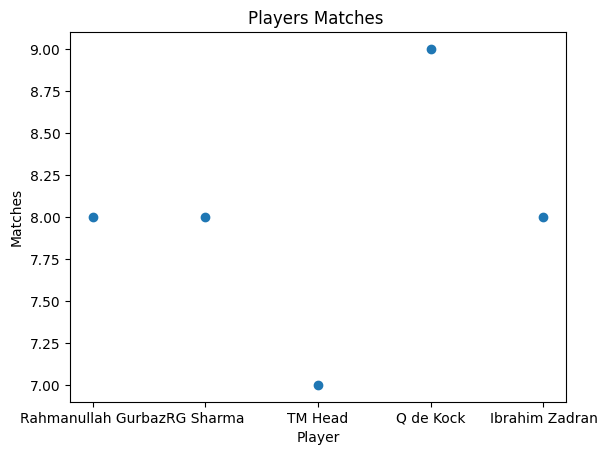

In [ ]:
#matches played by top 5 run scorers
top_5_players = batting.nlargest(5,'Runs')
print(top_5_players)
x = top_5_players['Player']
y = top_5_players['Mat']
plt.scatter(x,y)
plt.xlabel('Player')
plt.ylabel('Matches')
plt.title('Players Matches ')
plt.show()

In [ ]:
R = batting.drop(['Player','Team','Runs','Ave','SR','Mat'],axis=1)
S = batting['Runs']

In [ ]:
# Assuming 'R' contains non-numeric columns that need to be converted
R_encoded = pd.get_dummies(R, columns=['Inns', 'NO', 'HS'], drop_first=True)  # Replace 'Inns', 'NO', 'HS' with actual non-numeric column names

X_train, X_test, Y_train, Y_test = train_test_split(R_encoded, S, test_size=0.2, random_state=2)

model = LogisticRegression()
model.fit(X_train, Y_train)  # Fit the model with encoded data

LogisticRegression()

In [ ]:

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of the training data : ', training_data_accuracy)

#testing data prediction
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the training data :  0.583756345177665
Accuracy score of the test data :  0.16


In [ ]:
batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  247 non-null    object 
 1   Team    247 non-null    object 
 2   Mat     247 non-null    int64  
 3   Inns    247 non-null    int64  
 4   NO      247 non-null    int64  
 5   Runs    247 non-null    int64  
 6   HS      247 non-null    object 
 7   Ave     247 non-null    float64
 8   SR      247 non-null    float64
 9   100     247 non-null    int64  
 10  50      247 non-null    int64  
 11  0       247 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 23.3+ KB


In [ ]:
print(R.head())

   Inns  NO   HS  100  50  0
0     2   0    1    0   0  1
1     6   2  94*    0   1  1
2     3   0   42    0   0  0
3     1   0   17    0   0  0
4     1   0    9    0   0  0
